# 다중 선형회귀 분석 (Multivariable Linear Regression)

<hr>

## ✅가설 (hypothesis)
$$H(x) = Wx + b$$

- $H(x_{1}, x_{2}, .., x_{n}) = w_{1}x_{1} + w_{2}x_{2} + .. + w_{n}x_{n} + b$

<br><hr>

## ✅비용함수 (cost function)
$$cost(W, b) = \frac{1}{m} \sum_{i=1}^{m}(H(x^{(i)}-y^{(i)})^2$$

- $cost(W, b) = \frac{1}{m} \sum_{i=1}^{m}(H(x^{(i)}_1, x^{(i)}_2, x^{(i)}_3)-y^{(i)})^2$

<br><hr>

## ✅경사하강법 알고리즘
$$W := W -\alpha\frac{1}{m} \sum_{i=1}^{m}(H(x^{(i)}-y^{(i)}) x^{(i)}$$

<br><hr>

# 01-3. Multi Variable Linear Regression

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

In [2]:
# 데이터 생성
x_data = [[73., 80., 75.],   # 세 개의 IV
          [93., 88., 93.],
          [89., 91., 90.],
          [96., 98., 100.],
          [73., 66., 70.]
         ]   # 실수형으로 저장

y_data = [[152.],           # 하나의 DV
          [185.],
          [180.],
          [196.],
          [142.]]

In [3]:
# 예측 모델의 신경망 구성
tf.model = tf.keras.Sequential()

In [4]:
# 레이어 구성
tf.model.add(tf.keras.layers.Dense(
    units = 1,       # 출력값의 개수
    input_dim = 3)    # 입력값의 개수
)
# add() method로 구성하는 방법도 있음
tf.model.add(tf.keras.layers.Activation('linear'))

# 01-2 참고)
# tf.model.add(tf.keras.layers.Dense(units=1, input_dim=1, activation='linear'))

<hr>

In [5]:
# 현재 모델에 compile 함수로 학습시에 필요한 정보들 추가 
tf.model.compile(loss='mse',      # 비용(|손실) 함수
                optimizer=tf.keras.optimizers.SGD(learning_rate=0.1)
                )    # 최적의 w값을 찾을 때 적용할 알고리즘 (신경망의 hyper-parameter)

In [6]:
tf.model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 1)                 4         
_________________________________________________________________
activation (Activation)      (None, 1)                 0         
Total params: 4
Trainable params: 4
Non-trainable params: 0
_________________________________________________________________


In [7]:
# 모델학습 (손실값(loss)을 시각화하기 위해 변수에 저장)
loss = tf.model.fit(x_data,
                    y_data,
                    epochs=100    # 몇 번의 반복학습을 시킬건지 지정
                    )
# 아래 학습하는 과정에서 출력된 loss 값은 mse를 통해 계산된 값

Epoch 1/100
1/1 [==============================] - 0s 0s/step - loss: 2531.2004
Epoch 2/100
1/1 [==============================] - 0s 996us/step - loss: 48998146048.0000
Epoch 3/100
1/1 [==============================] - 0s 0s/step - loss: 948762398855004160.0000
Epoch 4/100
1/1 [==============================] - 0s 0s/step - loss: 18371112423007342454374400.0000
Epoch 5/100
1/1 [==============================] - 0s 997us/step - loss: 355724120626844088403343647440896.0000
Epoch 6/100
1/1 [==============================] - 0s 996us/step - loss: inf
Epoch 7/100
1/1 [==============================] - 0s 918us/step - loss: inf
Epoch 8/100
1/1 [==============================] - 0s 997us/step - loss: inf
Epoch 9/100
1/1 [==============================] - 0s 1000us/step - loss: inf
Epoch 10/100
1/1 [==============================] - 0s 996us/step - loss: inf
Epoch 11/100
1/1 [==============================] - 0s 986us/step - loss: inf
Epoch 12/100
1/1 [==============================] - 0s 0s

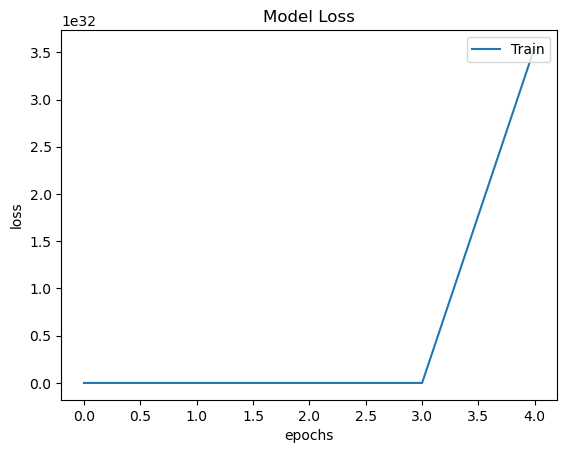

In [8]:
# 손실값(loss.history)의 변화를 시각화
plt.plot(loss.history['loss'])
plt.title("Model Loss")
plt.xlabel("epochs")
plt.ylabel("loss")
plt.legend(['Train'], loc='upper right')

<hr>

In [9]:
# 값이 발산하지 않도록 learning-rate 변경
# 현재 모델에 compile 함수로 학습시에 필요한 정보들 추가 
tf.model.compile(loss='mse',      # 비용(|손실) 함수
                optimizer=tf.keras.optimizers.SGD(learning_rate=1e-5)
                )
tf.model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 1)                 4         
_________________________________________________________________
activation (Activation)      (None, 1)                 0         
Total params: 4
Trainable params: 4
Non-trainable params: 0
_________________________________________________________________


In [10]:
# 모델학습 (손실값(loss)을 시각화하기 위해 변수에 저장)
loss = tf.model.fit(x_data,
                    y_data,
                    epochs=200    # 몇 번의 반복학습을 시킬건지 지정
                    )
# 아래 학습하는 과정에서 출력된 loss 값은 mse를 통해 계산된 값

Epoch 1/200
1/1 [==============================] - 0s 999us/step - loss: nan
Epoch 2/200
1/1 [==============================] - 0s 999us/step - loss: nan
Epoch 3/200
1/1 [==============================] - 0s 997us/step - loss: nan
Epoch 4/200
1/1 [==============================] - 0s 1000us/step - loss: nan
Epoch 5/200
1/1 [==============================] - 0s 1ms/step - loss: nan
Epoch 6/200
1/1 [==============================] - 0s 0s/step - loss: nan
Epoch 7/200
1/1 [==============================] - 0s 0s/step - loss: nan
Epoch 8/200
1/1 [==============================] - 0s 0s/step - loss: nan
Epoch 9/200
1/1 [==============================] - 0s 987us/step - loss: nan
Epoch 10/200
1/1 [==============================] - 0s 1ms/step - loss: nan
Epoch 11/200
1/1 [==============================] - 0s 995us/step - loss: nan
Epoch 12/200
1/1 [==============================] - 0s 0s/step - loss: nan
Epoch 13/200
1/1 [==============================] - 0s 996us/step - loss: nan
Epoch 14/2

1/1 [==============================] - 0s 0s/step - loss: nan
Epoch 108/200
1/1 [==============================] - 0s 0s/step - loss: nan
Epoch 109/200
1/1 [==============================] - 0s 0s/step - loss: nan
Epoch 110/200
1/1 [==============================] - 0s 995us/step - loss: nan
Epoch 111/200
1/1 [==============================] - 0s 0s/step - loss: nan
Epoch 112/200
1/1 [==============================] - 0s 964us/step - loss: nan
Epoch 113/200
1/1 [==============================] - 0s 0s/step - loss: nan
Epoch 114/200
1/1 [==============================] - 0s 987us/step - loss: nan
Epoch 115/200
1/1 [==============================] - 0s 0s/step - loss: nan
Epoch 116/200
1/1 [==============================] - 0s 999us/step - loss: nan
Epoch 117/200
1/1 [==============================] - 0s 1ms/step - loss: nan
Epoch 118/200
1/1 [==============================] - 0s 998us/step - loss: nan
Epoch 119/200
1/1 [==============================] - 0s 0s/step - loss: nan
Epoch 120/

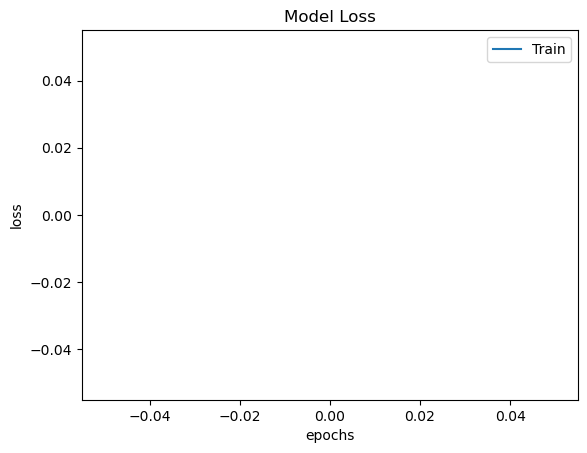

In [11]:
# 손실값(loss.history)의 변화를 시각화
plt.plot(loss.history['loss'])
plt.title("Model Loss")
plt.xlabel("epochs")
plt.ylabel("loss")
plt.legend(['Train'], loc='upper right')

In [12]:
# 최종 다중 회귀분석 예측모델 
weights = tf.model.layers[0].get_weights()
weights
# [0.9187013], [0.30915576], [0.09161894]

# 최종 모델
# H(x1, x2, x3) = 0.9187013*x1 + 0.30915576*x2 + 0.09161894*x3 + 0.00322388

[array([[nan],
        [nan],
        [nan]], dtype=float32),
 array([nan], dtype=float32)]

<hr>

In [13]:
# 새로운 데이터셋이 주어졌다고 가정 (예측을 위해)
pred = tf.model.predict(np.array([
    [72., 93., 90.] # x1, x2, x3에 이 값을 넣고 계산하면 됨
]))
pred  # 157.6559로 예측

array([[nan]], dtype=float32)